# Fitting with only the variables in DS1
To get a working model.  Note that the variables are not coded with descriptive labels.  

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PowerTransformer, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, CategoricalEncoder

import pandas as pd
import numpy as np

In [29]:
# Read in the tsv file
df = pd.read_csv('06693-0001-Data.tsv', delim_whitespace=True)

# Make a helper dictionary to keep track of 'response', 'numerical', 'categorical'

var_dict = {
    'response': 'V1144',
    'cat_preds': ['V12', 'V13', 'V4515', 'V5114', 'V5118', 'V5113', 'V5115',\
                  'V5112', 'V4428', 'V4433', 'V6305', 'V6301','V5225', 'V6649',\
                  'V6749', 'V5918', 'V6143', 'V6126', 'V6114', 'V101', 'V102', 'V6215'],
    'num_preds': []
}

In [30]:
# df.shape
df.shape

(8098, 2954)

In [31]:
df[var_dict['response']].value_counts()

5    4201
0    3511
1     379
9       7
Name: V1144, dtype: int64

In [32]:
for col in var_dict['cat_preds']:
    print(col + ":")
    print(df[col].value_counts())

V12:
30    298
33    297
31    284
32    282
27    266
34    265
35    258
36    250
37    249
28    245
29    240
40    239
26    230
39    226
38    226
25    219
41    212
24    209
42    200
23    197
44    197
20    197
43    185
21    180
22    179
19    168
16    167
46    167
17    160
47    160
18    159
15    152
50    151
48    149
45    148
52    146
53    145
49    141
54    136
51    110
55      4
59      2
58      1
61      1
99      1
Name: V12, dtype: int64
V13:
2    4263
1    3835
Name: V13, dtype: int64
V4515:
0    3244
9    2132
1    1921
3     576
2     192
4      33
Name: V4515, dtype: int64
V5114:
3    2579
9    2171
2    1548
4    1340
1     391
0      67
8       2
Name: V5114, dtype: int64
V5118:
4    2871
3    2217
9    2180
2     629
1     131
0      67
8       3
Name: V5118, dtype: int64
V5113:
3    2828
9    2163
2    1342
4    1294
1     404
0      67
Name: V5113, dtype: int64
V5115:
3    3056
9    2165
2    1287
4    1273
1     249
0      67
8       1
Nam

In [33]:
# Make a train-test split:
train_set, test_set = train_test_split(df, random_state=1, stratify=df[var_dict['response']])


In [34]:
print(train_set.shape, test_set.shape)

(6073, 2954) (2025, 2954)


In [39]:
# Define a method to select attributes from a DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# We will need this later
#num_pipeline = Pipeline([
#    ('selector', DataFrameSelector(num_attribs)),
#    ('power_transf', PowerTransformer(method='yeo-johnson', standardize=False)),
#    ('minmax_scaler', MinMaxScaler()),
#])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

full_pipeline = FeatureUnion(transformer_list=[
    #("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])




In [40]:
#num_attribs = var_dict['num_preds']
cat_attribs = var_dict['cat_preds']


y_train = train_set[var_dict['response']]

# Prepare the training data with the pipeline above
X_train_prepared = cat_pipeline.fit_transform(train_set)
X_train_prepared

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [41]:
X_train_prepared.shape

(6073, 158)

In [42]:
X_test_prepared = cat_pipeline.transform(test_set)

In [43]:
X_test_prepared.shape

(2025, 158)

In [44]:
%whos

Variable             Type            Data/Info
----------------------------------------------
BaseEstimator        type            <class 'sklearn.base.BaseEstimator'>
CategoricalEncoder   type            <class 'sklearn.preproces<...>data.CategoricalEncoder'>
DataFrameSelector    type            <class '__main__.DataFrameSelector'>
FeatureUnion         ABCMeta         <class 'sklearn.pipeline.FeatureUnion'>
LabelBinarizer       type            <class 'sklearn.preproces<...>ng.label.LabelBinarizer'>
MinMaxScaler         type            <class 'sklearn.preprocessing.data.MinMaxScaler'>
OneHotEncoder        type            <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Pipeline             ABCMeta         <class 'sklearn.pipeline.Pipeline'>
PowerTransformer     type            <class 'sklearn.preproces<...>g.data.PowerTransformer'>
TransformerMixin     type            <class 'sklearn.base.TransformerMixin'>
X_test_prepared      ndarray         2025x158: 319950 elems, type `float

In [45]:
cat_pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['V12', 'V13', 'V4515', 'V5114', 'V5118', 'V5113', 'V5115', 'V5112', 'V4428', 'V4433', 'V6305', 'V6301', 'V5225', 'V6649', 'V6749', 'V5918', 'V6143', 'V6126', 'V6114', 'V101', 'V102', 'V6215'])), ('encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False))])>

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prepared, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
tree_pred = tree_clf.predict(X_test_prepared)

In [48]:
from sklearn.metrics import classification_report
y_train_pred = tree_clf.predict(X_train_prepared)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2633
           1       1.00      0.99      0.99       284
           5       0.99      0.90      0.94      3151
           9       1.00      0.60      0.75         5

   micro avg       0.94      0.94      0.94      6073
   macro avg       0.97      0.87      0.91      6073
weighted avg       0.95      0.94      0.94      6073



In [51]:
tree_clf.classes_

array([0, 1, 5, 9], dtype=int64)

In [55]:
y_test = test_set['V1144']

In [56]:
y_test_pred = tree_clf.predict(X_test_prepared)

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       878
           1       0.46      0.43      0.45        95
           5       0.63      0.55      0.58      1050
           9       0.00      0.00      0.00         2

   micro avg       0.59      0.59      0.59      2025
   macro avg       0.41      0.41      0.41      2025
weighted avg       0.59      0.59      0.58      2025



In [112]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, multi_class='auto', n_jobs=-1,verbose=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False)

In [113]:
classifier.fit(X_train_prepared, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 359 epochs took 11 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False)

In [114]:
print(f"Training Data Score: {classifier.score(X_train_prepared, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_prepared, y_test)}")

Training Data Score: 0.677589329820517
Testing Data Score: 0.6617283950617284


In [115]:
y_test_pred = classifier.predict(X_test_prepared)

In [116]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       878
           1       0.61      0.39      0.47        95
           5       0.68      0.67      0.68      1050
           9       0.00      0.00      0.00         2

   micro avg       0.66      0.66      0.66      2025
   macro avg       0.48      0.44      0.45      2025
weighted avg       0.66      0.66      0.66      2025



C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
import seaborn as sns

In [119]:
conf_mx = confusion_matrix(y_test, y_test_pred)

In [120]:
classifier.classes_

array([0, 1, 5, 9], dtype=int64)

In [121]:
conf_df= pd.DataFrame(conf_mx, index=classifier.classes_, columns=classifier.classes_)

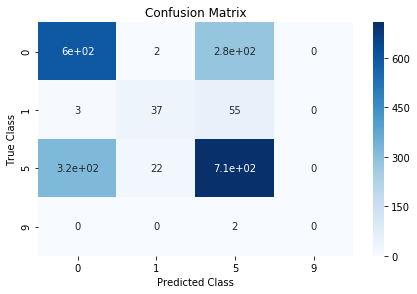

In [122]:
import matplotlib.pyplot as plt
sns.heatmap(conf_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [123]:
from sklearn.dummy import DummyClassifier

In [124]:
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

In [125]:
dummy.fit(X_train_prepared, y_train)

DummyClassifier(constant=None, random_state=1, strategy='most_frequent')

In [126]:
dummy.score(X_test_prepared, y_test)

0.5185185185185185

In [127]:
dummy.classes_

array([0, 1, 5, 9], dtype=int64)

In [128]:
DummyClassifier?

In [129]:
dummy2 = DummyClassifier(strategy='constant', random_state=1, constant=5)

In [130]:
dummy2.fit(X_train_prepared, y_train)

DummyClassifier(constant=5, random_state=1, strategy='constant')

In [131]:
dummy.score(X_test_prepared, y_test)   # same as 'most_frequent'

0.5185185185185185

In [132]:
LogisticRegression?

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
cross_val_score(classifier, X_train_prepared, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.7s finished


array([0.65597236, 0.64740741, 0.65924827])

In [135]:
from sklearn.base import BaseEstimator

In [136]:
import numpy as np

In [139]:
class Always0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))
    

In [140]:
always_0_classifer = Always0Classifier()

In [141]:
cross_val_score(always_0_classifer, X_train_prepared, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.43209877, 0.43280632, 0.43577075])

In [142]:
y_train.value_counts()

5    3151
0    2633
1     284
9       5
Name: V1144, dtype: int64

In [143]:
y_test.value_counts()

5    1050
0     878
1      95
9       2
Name: V1144, dtype: int64

In [144]:
2633/len(y_train)

0.4335583731269554

In [145]:
284/len(y_train)

0.046764366869751356

In [147]:
from sklearn.model_selection import cross_val_predict

In [148]:
y_cv_train_pred = cross_val_predict(classifier, X_train_prepared, y_train, cv=5, n_jobs=-1)

In [149]:
confusion_matrix(y_train, y_cv_train_pred)

array([[1735,   15,  883,    0],
       [  10,  109,  165,    0],
       [ 931,   76, 2144,    0],
       [   5,    0,    0,    0]], dtype=int64)

In [150]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train, y_cv_train_pred, average='weighted')

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6545658021902973

In [155]:
recall_score(y_train, y_cv_train_pred, average='weighted')

0.6566770953400296

In [157]:
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50]}

In [161]:
grid = GridSearchCV(classifier, param_grid, verbose=3, n_jobs=-1)

In [162]:
grid.fit(X_train_prepared, y_train)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 out of  18 | elapsed:    4.4s remaining:   35.9s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   50.1s remaining:   50.1s
[Parallel(n_jobs=-1)]: Done  16 out of  18 | elapsed:   54.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   55.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 29 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [163]:
print(grid.best_score_)

0.6583237279762885


In [164]:
print(grid.best_params_)

{'C': 0.1}


In [165]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]}

In [166]:
grid = GridSearchCV(classifier, param_grid, verbose=3, n_jobs=-1)

In [167]:
grid.fit(X_train_prepared, y_train)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    3.8s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    6.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 47 epochs took 2 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [168]:
grid.best_params_

{'C': 0.3}

In [169]:
grid.best_score_

0.6588177177671661